In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load csv

file = r'D:\Python\Code\ciao.football\Serie A\juve.csv'
df = pd.read_csv(file, parse_dates=['Date'])

In [3]:
df.head()

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2020-09-20,20:45 (21:45),Matchweek 1,Sun,Home,W,3,0,Sampdoria,2.4,0.8,66,1000.0,Giorgio Chiellini,3-4-3,Marco Piccinini,Match Report,NaN
1,2020-09-27,20:45 (21:45),Matchweek 2,Sun,Away,D,2,2,Roma,1.3,2.7,60,1000.0,Giorgio Chiellini,4-4-2,Marco Di Bello,Match Report,NaN
2,2020-10-17,20:45 (21:45),Matchweek 4,Sat,Away,D,1,1,Crotone,1.6,1.1,54,1000.0,Leonardo Bonucci,3-4-3,Francesco Fourneau,Match Report,NaN
3,2020-10-25,20:45 (21:45),Matchweek 5,Sun,Home,D,1,1,Hellas Verona,1.8,0.7,61,1000.0,Leonardo Bonucci,3-5-2,Fabrizio Pasqua,Match Report,NaN
4,2020-11-01,15:00 (16:00),Matchweek 6,Sun,Away,W,4,1,Spezia,3.4,0.7,56,NaN,Leonardo Bonucci,4-4-2,Rosario Abisso,Match Report,NaN


In [4]:
df['Formation'].unique()

array(['3-4-3', '4-4-2', '3-5-2', '4-2-3-1'], dtype=object)

In [5]:
df['Formation'].value_counts()

4-4-2      24
3-5-2       6
3-4-3       3
4-2-3-1     1
Name: Formation, dtype: int64

Text(0.9, 0.08, '@ciao.football\nData from FBref / StatsBomb')

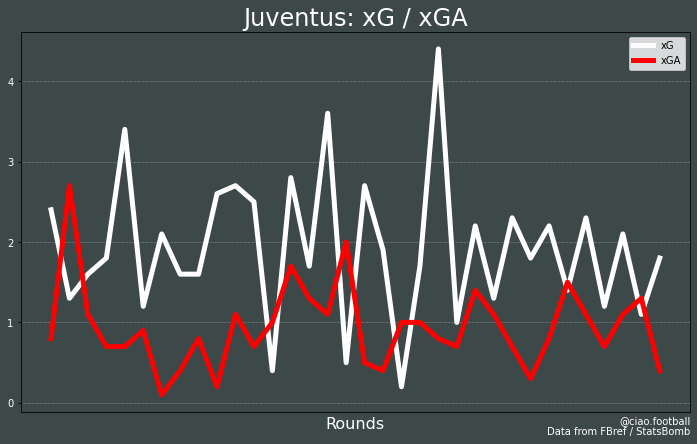

In [6]:
fig, ax = plt.subplots(figsize = (12,7))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)

# Hiding y labels (dates)
plt.xticks([], color='white')
plt.yticks(color='white')

x = df['xG']
y = df['xGA']

ax.plot(x, color='w', label='xG', linewidth=5)
ax.plot(y, color='r', label='xGA', linewidth=5)

ax.set_xlabel('Rounds', color='white',fontsize=16)
ax.legend()
ax.set_title('Juventus: xG / xGA', fontsize=24, color='white')
plt.figtext(0.9, 0.08, '@ciao.football\nData from FBref / StatsBomb', horizontalalignment='right', color='w')

Text(0.9, 0.08, '@ciao.football\nData from FBref / StatsBomb')

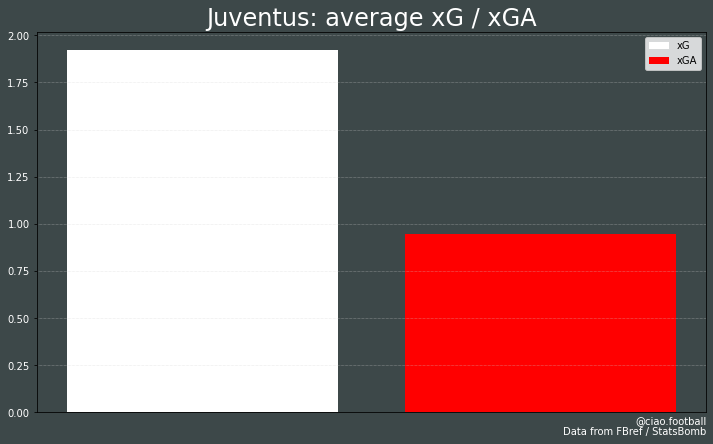

In [7]:
fig, ax = plt.subplots(figsize = (12,7))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)

# Hiding y labels (dates)
plt.xticks([], color='white')
plt.yticks(color='white')

x = df['xG']
y = df['xGA']

ax.bar('xG', x.mean(), color='w', label='xG', linewidth=5)
ax.bar('xGA', y.mean(), color='r', label='xGA', linewidth=5)

ax.legend()
ax.set_title('Juventus: average xG / xGA', fontsize=24, color='white')
plt.figtext(0.9, 0.08, '@ciao.football\nData from FBref / StatsBomb', horizontalalignment='right', color='w')

In [8]:
#Getting a column with cumulative result
df['cumsum_xg'] = df['xG'].cumsum()
df['cumsum_xga'] = df['xGA'].cumsum()

Text(0.9, 0.08, '@ciao.football\nData from FBref / StatsBomb')

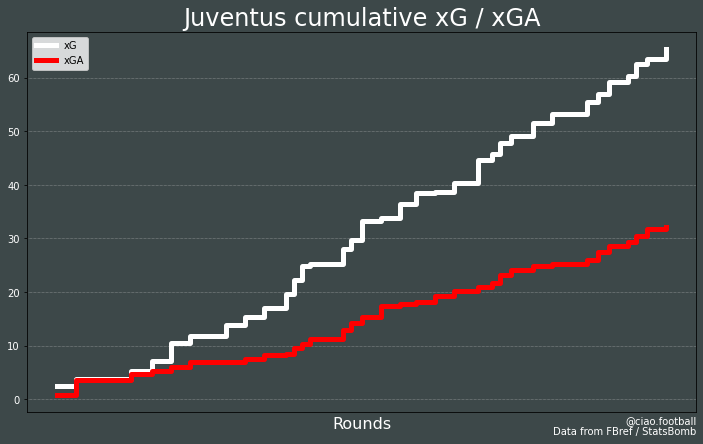

In [9]:
fig, ax = plt.subplots(figsize = (12,7))
fig.set_facecolor('#3d4849')
ax.patch.set_facecolor('#3d4849')

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)

# Hiding y labels (dates)
plt.xticks([], color='white')
plt.yticks(color='white')

# Passing our lists to step object to plot the chart
ax.step(x=df['Date'],y=df['cumsum_xg'],color='white',linewidth=5, where='post', label='xG')
ax.step(x=df['Date'],y=df['cumsum_xga'],color='red',linewidth=5, where='post', label='xGA') #check the where option

ax.set_xlabel('Rounds', color='white',fontsize=16)
ax.legend()
ax.set_title('Juventus cumulative xG / xGA', fontsize=24, color='white')
plt.figtext(0.9, 0.08, '@ciao.football\nData from FBref / StatsBomb', horizontalalignment='right', color='w')